## Star Trek Dialogue Analysis - Character Significance Measures

In [67]:
import json
import pandas as pd
import os
# import re
import numpy as np
import matplotlib.pyplot as plt
# import logging
# from collections import Counter

In [2]:
path = r'C:\Users\anon\Documents\CareerFoundry\Data Analytics Immersion\6\Data\Altered Data'

In [3]:
# Define main cast variables

main_cast = {
    'tos': ['KIRK', 'SPOCK', 'UHURA', 'CHEKOV', 'SULU', 'CHAPEL', 'COMPUTER', 'MCCOY', 'SCOTT'],
    'tas': ['KIRK', 'SPOCK', 'UHURA', 'CHEKOV', 'SULU', 'CHAPEL', 'COMPUTER', 'MCCOY', 'SCOTT'],
    'tng': ['PICARD', 'RIKER', 'WORF', 'DATA', 'TROI', 'CRUSHER', 'TASHA', 'CHIEF', "O'BRIEN", 'GUINAN', 'LAFORGE', 'PULASKI', 'WESLEY'],
    'ds9': ['SISKO', 'ODO', 'KIRA', 'JAKE', 'QUARK', 'DAX', "O'BRIEN", 'BASHIR', 'WORF', 'EZRI'],
    'voy': ['JANEWAY', 'CHAKOTAY', 'TUVOK', 'PARIS', 'TORRES', 'KIM', 'EMH', 'NEELIX', 'KES', 'SEVEN', 'ICHEB', 'SESKA'],
    'ent': ['ARCHER', 'DEGRA', 'HOSHI', 'PHLOX', 'REED', 'SHRAN', "T'POL", 'TRAVIS', 'TUCKER'],
    'dis': ['BURNHAM', 'SARU', 'VOQ', 'TYLER', 'STAMETS', 'TILLY', 'LORCA', 'CULBER', 'PIKE', 'BOOK', 'NHAN', 'ADIRA', 'GRAY', 'GEORGIOU', 'DETMER', 'OWOSEKUN', "L'RELL", 'SAREK', 'CORNWELL', 'AIRIAM', 'SPOCK'],
    'pic': ['PICARD', 'AGNES', 'DAHJ', 'DATA', 'ELNOR', 'HUGH', 'SOJI', 'RAFFI', 'RIOS', 'NAREK', 'SEVEN', 'RIZZO']
}

In [4]:
series_dataframes = {}

In [5]:
# Grab series csvs and load them into dfs
def load_series_dataframes(path):

    for filename in os.listdir(path):
        if filename.endswith('csv'):
            series = filename.split('_')[0]

            # Load the df
            df = pd.read_csv(os.path.join(path, filename))

            # Drop the existing index and 'Unnamed: 0' column if they exist
            df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
            df.reset_index(drop=True, inplace=True)

            # Save the df to csv without the index and 'Unnamed: 0' column
            df.to_csv(f'{series}_df_cleaned.csv', index=False)

            # Store df in the series_dataframes dictionary
            series_dataframes[series] = df

    return series_dataframes

In [42]:
series_dataframes

{'dis':      Episode  Season  Year                    Title Character Gender  \
 0    dis_000  dis_s1  2017         The Vulcan Hello   BURNHAM      f   
 1    dis_000  dis_s1  2017         The Vulcan Hello  GEORGIOU      f   
 2    dis_000  dis_s1  2017         The Vulcan Hello      SARU      m   
 3    dis_000  dis_s1  2017         The Vulcan Hello    DETMER      f   
 4    dis_000  dis_s1  2017         The Vulcan Hello     SAREK      m   
 ..       ...     ...   ...                      ...       ...    ...   
 423  dis_041  dis_s3  2020  That Hope Is You part 2   BURNHAM      f   
 424  dis_041  dis_s3  2020  That Hope Is You part 2    DETMER      f   
 425  dis_041  dis_s3  2020  That Hope Is You part 2     TILLY      f   
 426  dis_041  dis_s3  2020  That Hope Is You part 2   STAMETS      m   
 427  dis_041  dis_s3  2020  That Hope Is You part 2  OWOSEKUN      f   
 
                                               Dialogue  \
 0    ["We come in peace. That's why we're here. Isn... 

In [43]:
dataframe_names = list(series_dataframes.keys())

In [44]:
dataframe_names

['dis', 'ds9', 'ent', 'pic', 'tas', 'tng', 'tos', 'voy']

### Character with the most lines in each series

In [51]:
# Get the total sum of all 'Dialogue Length' for each character

def total_dialogue_length_by_character(series_dataframes):

    for series, df in series_dataframes.items():

        character_totals = df.groupby('Character')['Dialogue Length'].sum()

        totals_by_character[series] = character_totals

    return totals_by_character

In [52]:
character_dialogue_totals = total_dialogue_length_by_character(loaded_dataframes)

for series, totals in character_dialogue_totals.items():
    print(f"Series: {series}")
    print(totals)
    print()

Series: dis
Character
ADIRA        168
AIRIAM        71
BOOK         405
BURNHAM     2776
CORNWELL     209
CULBER       383
DETMER       256
GEORGIOU     767
GRAY          42
L'RELL       167
LORCA        484
NHAN          87
OWOSEKUN     224
PIKE         815
SAREK        121
SARU        1300
SPOCK        295
STAMETS      703
TILLY        821
TYLER        527
VOQ           58
Name: Dialogue Length, dtype: int64

Series: ds9
Character
BASHIR     5134
DAX        3874
EZRI        994
JAKE       1513
KIRA       5493
O'BRIEN    4959
ODO        4777
QUARK      4499
SISKO      8670
WORF       2077
Name: Dialogue Length, dtype: int64

Series: ent
Character
ARCHER    8531
DEGRA      319
HOSHI     1576
PHLOX     1993
REED      2592
SHRAN      419
T'POL     4336
TRAVIS    1318
TUCKER    4443
Name: Dialogue Length, dtype: int64

Series: pic
Character
AGNES     241
DAHJ       57
DATA       29
ELNOR      80
HUGH       52
NAREK     176
PICARD    743
RAFFI     310
RIOS      248
RIZZO      76
SEVEN    

In [53]:
# Number of episodes each character appears in

def episode_count_by_character(series_dataframes):
    episode_counts_by_character = {}

    for series, df in series_dataframes.items():

        character_episode_counts = df.groupby('Character')['Episode'].nunique()

        episode_counts_by_character[series] = character_episode_counts

    return episode_counts_by_character

In [56]:
character_episode_counts = episode_count_by_character(loaded_dataframes)

for series, counts in character_episode_counts.items():
    print(f"Series: {series}")
    print(counts)
    print()

Series: dis
Character
ADIRA        9
AIRIAM      17
BOOK        10
BURNHAM     42
CORNWELL    12
CULBER      28
DETMER      36
GEORGIOU    23
GRAY         4
L'RELL      14
LORCA       11
NHAN        11
OWOSEKUN    34
PIKE        15
SAREK        8
SARU        41
SPOCK       12
STAMETS     39
TILLY       38
TYLER       20
VOQ          4
Name: Episode, dtype: int64

Series: ds9
Character
BASHIR     169
DAX        146
EZRI        25
JAKE        71
KIRA       171
O'BRIEN    158
ODO        167
QUARK      154
SISKO      173
WORF        97
Name: Episode, dtype: int64

Series: ent
Character
ARCHER    97
DEGRA     12
HOSHI     91
PHLOX     89
REED      93
SHRAN     10
T'POL     97
TRAVIS    89
TUCKER    97
Name: Episode, dtype: int64

Series: pic
Character
AGNES     10
DAHJ       2
DATA       2
ELNOR      7
HUGH       3
NAREK      8
PICARD    10
RAFFI      9
RIOS       8
RIZZO      7
SEVEN      5
SOJI       9
Name: Episode, dtype: int64

Series: tas
Character
CHAPEL       5
COMPUTER     6
KIRK  

In [63]:
# Calculate average dialogue length per episode for each character
def average_dialogue_length_per_episode(character_dialogue_totals, character_episode_counts):
    
    average_lengths = {}

    for series in character_dialogue_totals.keys():
        
        averages = character_dialogue_totals[series] / character_episode_counts[series]
        
        rounded_averages = averages.round().astype(int)

        average_lengths[series] = rounded_averages

    return average_lengths

In [64]:
average_lengths_per_episode = average_dialogue_length_per_episode(character_dialogue_totals, character_episode_counts)

In [65]:
for series, averages in average_lengths_per_episode.items():
    print(f"Series: {series}")
    print(averages)
    print()

Series: dis
Character
ADIRA       19
AIRIAM       4
BOOK        40
BURNHAM     66
CORNWELL    17
CULBER      14
DETMER       7
GEORGIOU    33
GRAY        10
L'RELL      12
LORCA       44
NHAN         8
OWOSEKUN     7
PIKE        54
SAREK       15
SARU        32
SPOCK       25
STAMETS     18
TILLY       22
TYLER       26
VOQ         14
dtype: int32

Series: ds9
Character
BASHIR     30
DAX        27
EZRI       40
JAKE       21
KIRA       32
O'BRIEN    31
ODO        29
QUARK      29
SISKO      50
WORF       21
dtype: int32

Series: ent
Character
ARCHER    88
DEGRA     27
HOSHI     17
PHLOX     22
REED      28
SHRAN     42
T'POL     45
TRAVIS    15
TUCKER    46
dtype: int32

Series: pic
Character
AGNES     24
DAHJ      28
DATA      14
ELNOR     11
HUGH      17
NAREK     22
PICARD    74
RAFFI     34
RIOS      31
RIZZO     11
SEVEN     16
SOJI      32
dtype: int32

Series: tas
Character
CHAPEL      13
COMPUTER     8
KIRK        63
MCCOY       19
SCOTT       13
SPOCK       35
SULU        14
U

In [76]:
# Graph it

def plot_average_dialogue_length(average_lengths_per_episode):
    for series, rounded_averages in average_lengths_per_episode.items():
        
        sorted_data = rounded_averages.sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        plt.bar(sorted_data.index, sorted_data)

        plt.xlabel('Character')
        plt.ylabel('Average Dialogue Length per Episode')
        plt.title(f'Average Dialogue Length per Episode for {series}')

        plt.xticks(rotation=90)
        plt.show()

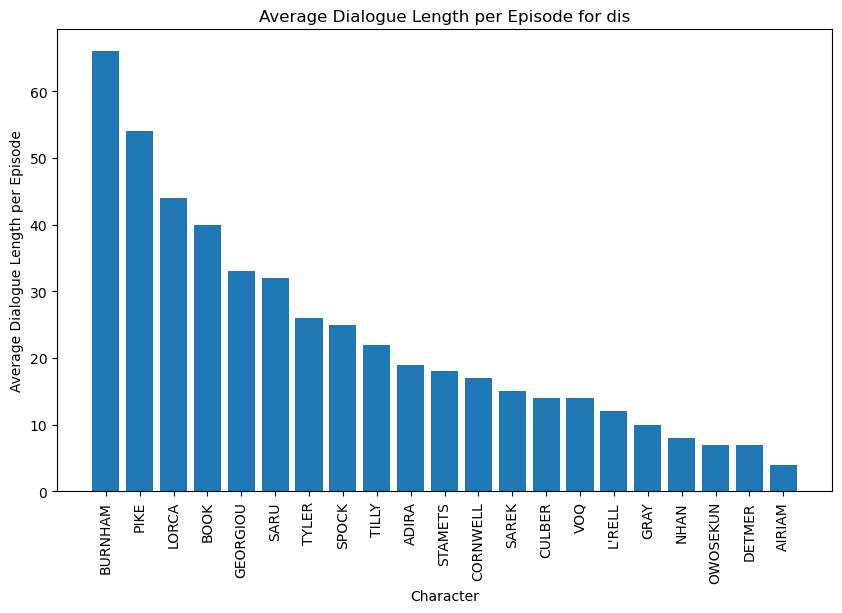

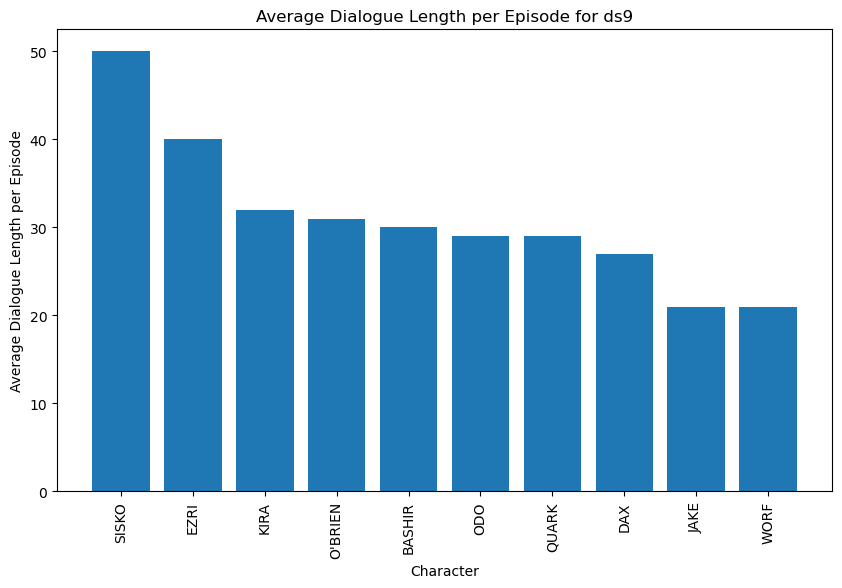

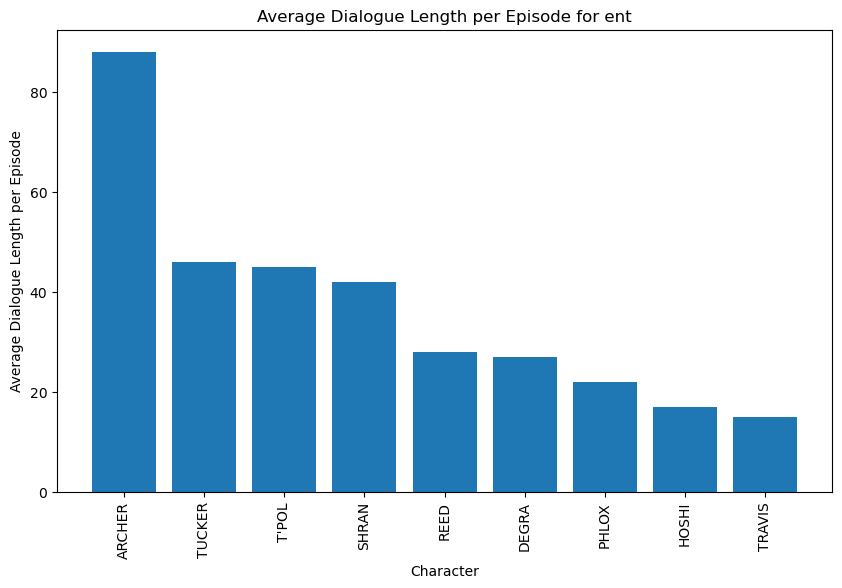

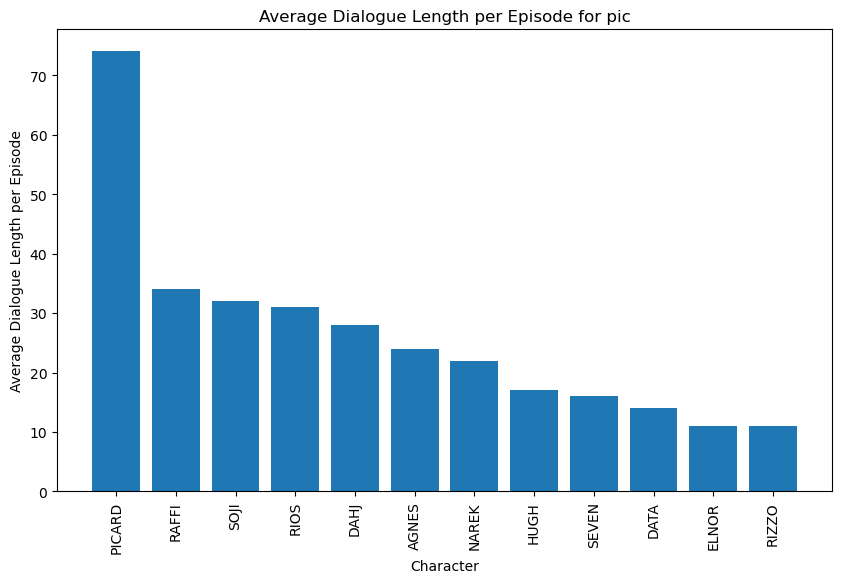

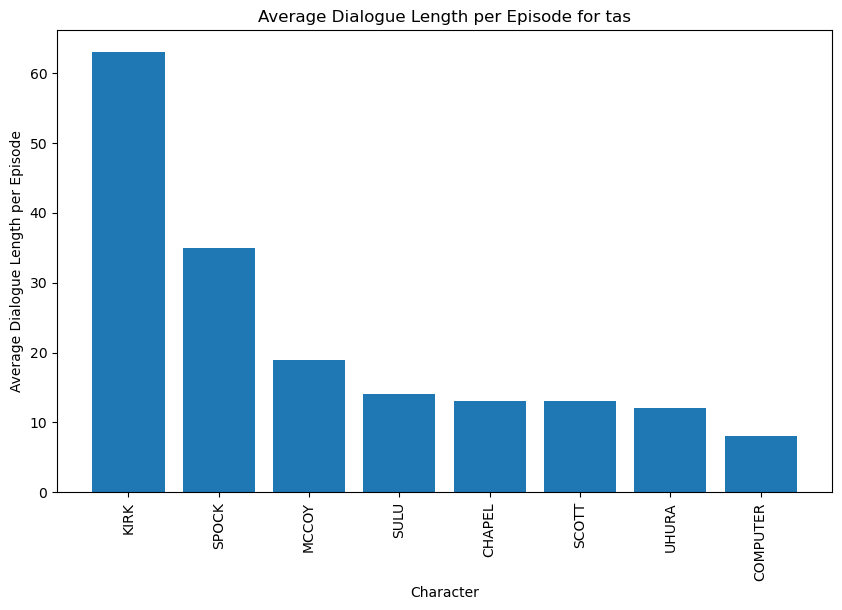

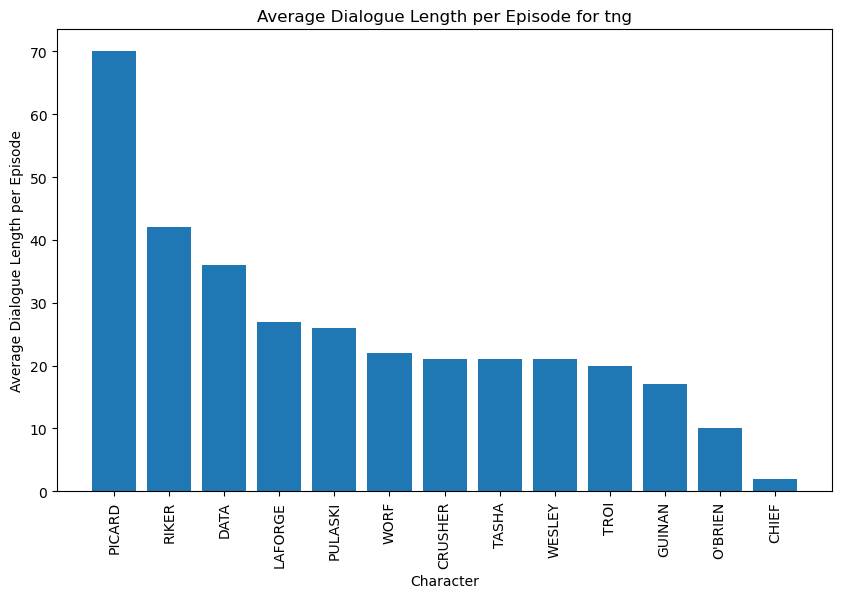

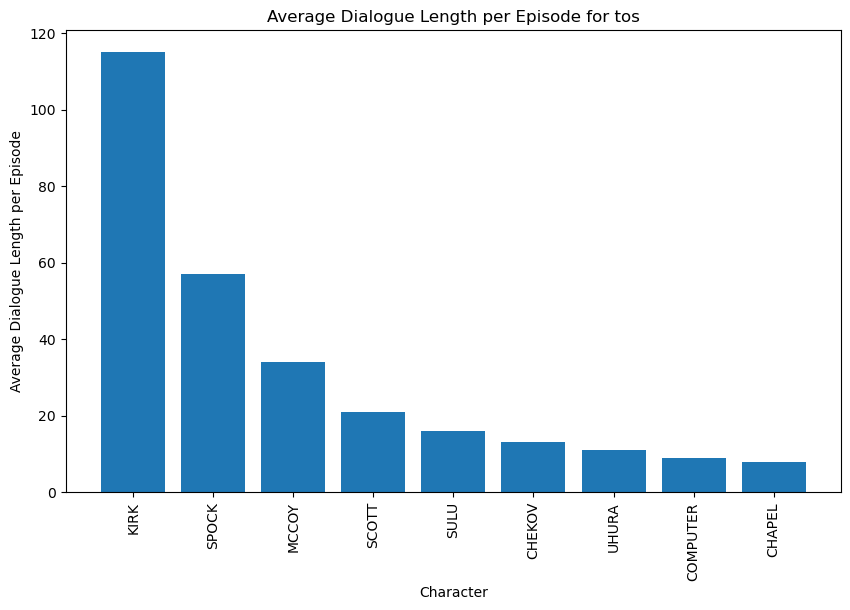

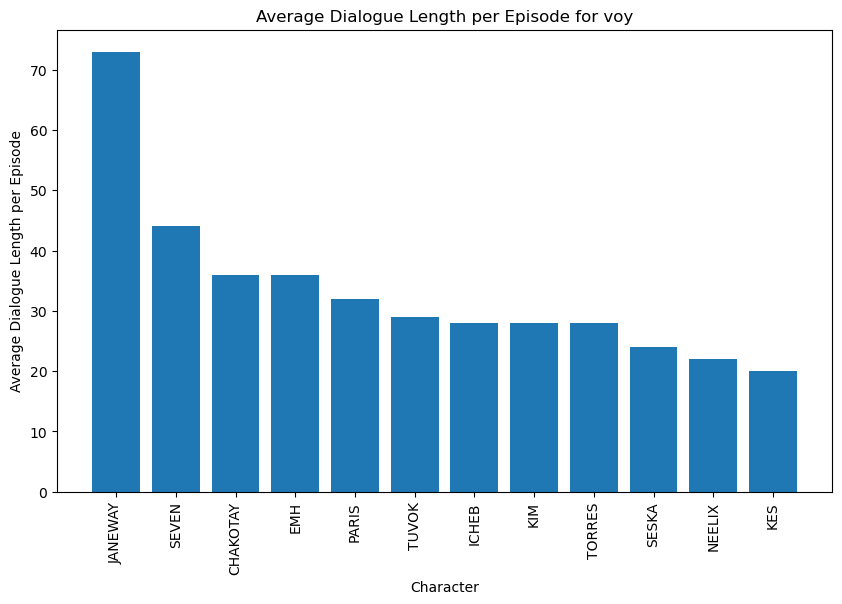

In [77]:
plot_average_dialogue_length(average_lengths_per_episode)

### Percentage of episodes each character appears in

In [84]:
# Calculate total number of episodes per series

def calculate_total_episodes_per_series(series_dataframes):
    
    episodes = {}

    for series, df in series_dataframes.items():
        
        episodes[series] = df['Episode'].nunique()

    return episodes

In [85]:
unique_episodes_per_series = calculate_total_episodes_per_series(series_dataframes)
print(unique_episodes_per_series)

{'dis': 42, 'ds9': 173, 'ent': 97, 'pic': 10, 'tas': 22, 'tng': 176, 'tos': 80, 'voy': 160}


In [100]:
def calculate_character_percentage(character_episode_counts, series_dataframes):
    
    character_percentages = {}

    for series, character_counts in character_episode_counts.items():
        total_episodes_in_series = unique_episodes_per_series[series]
        percentages = (character_counts / total_episodes_in_series) * 100
        rounded_percentages = percentages.round().astype(int)
        character_percentages[series] = rounded_percentages

    return character_percentages

In [105]:
character_percentages = calculate_character_percentage(character_episode_counts, series_dataframes)

In [102]:
# Graph it

def plot_percentage_episodes_each_character_appears(character_percentages):
    for series, rounded_averages in character_percentages.items():
        
        sorted_data = rounded_averages.sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        plt.bar(sorted_data.index, sorted_data)

        plt.xlabel('Character')
        plt.ylabel('Percentage of Episodes Seen In')
        plt.title(f'Character Percentages for {series}')

        plt.xticks(rotation=90)
        plt.show()

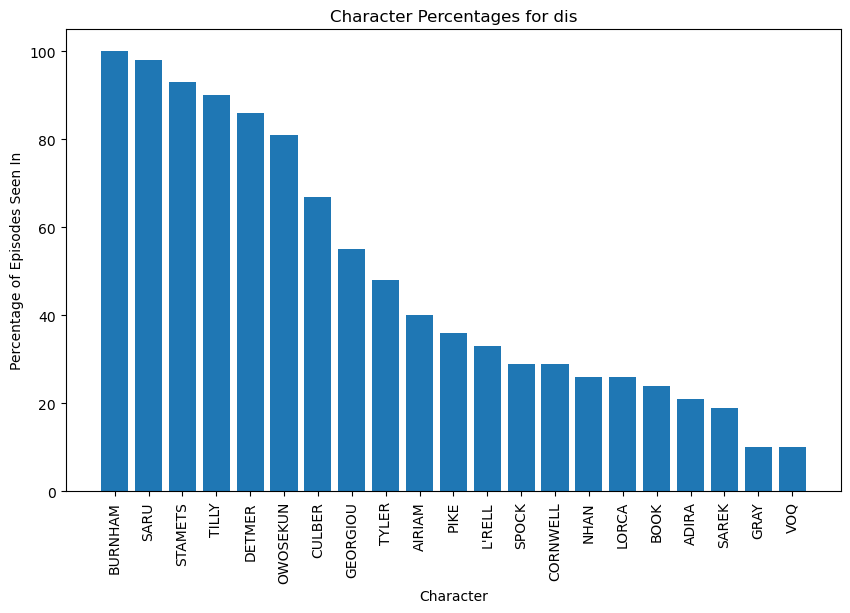

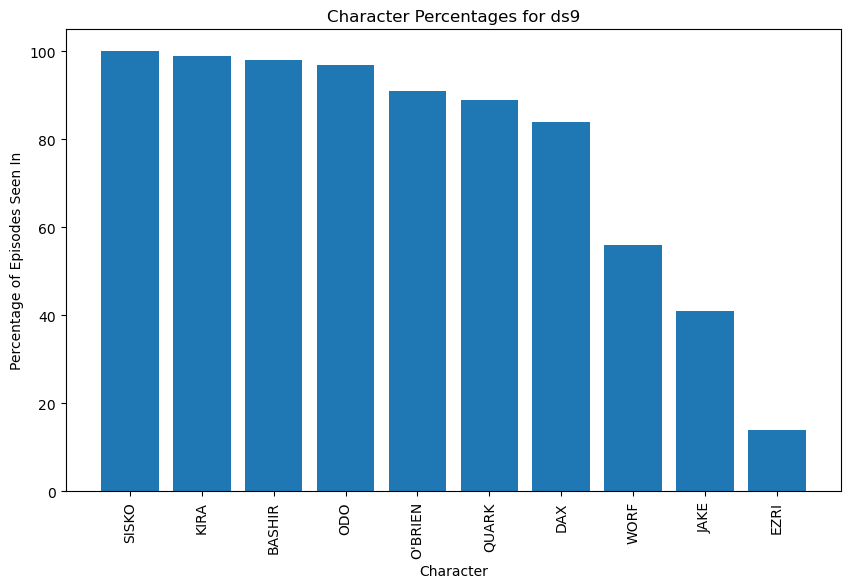

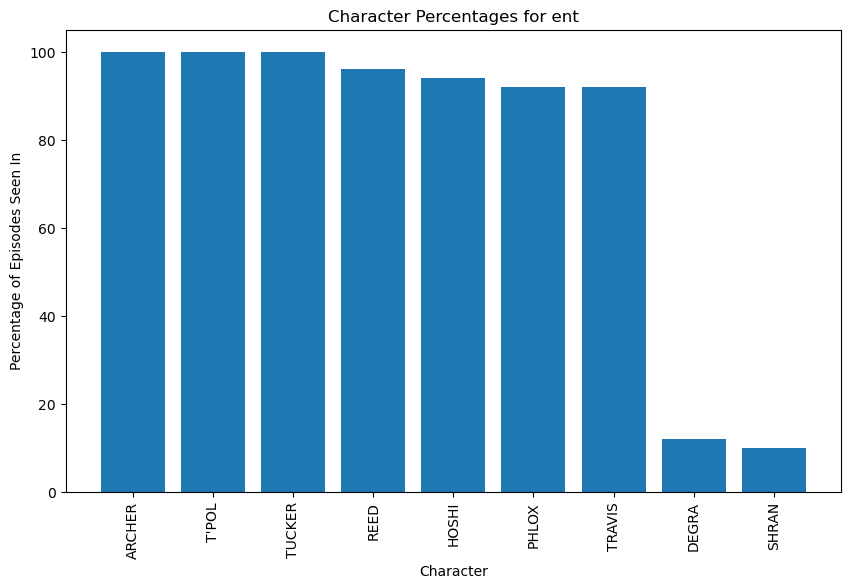

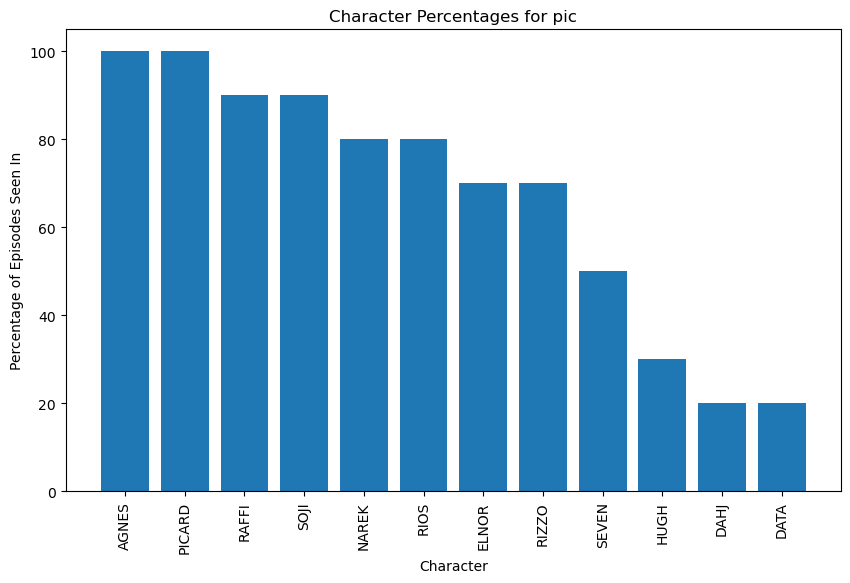

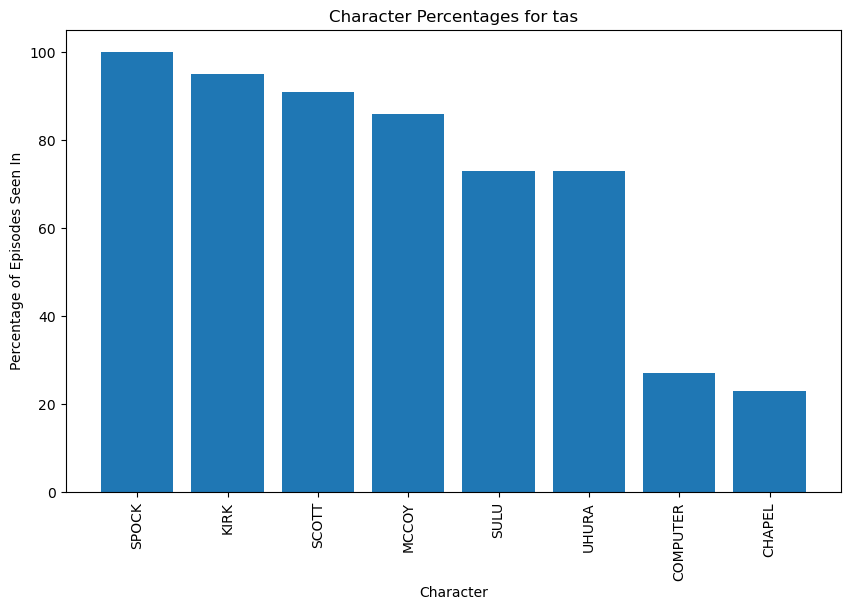

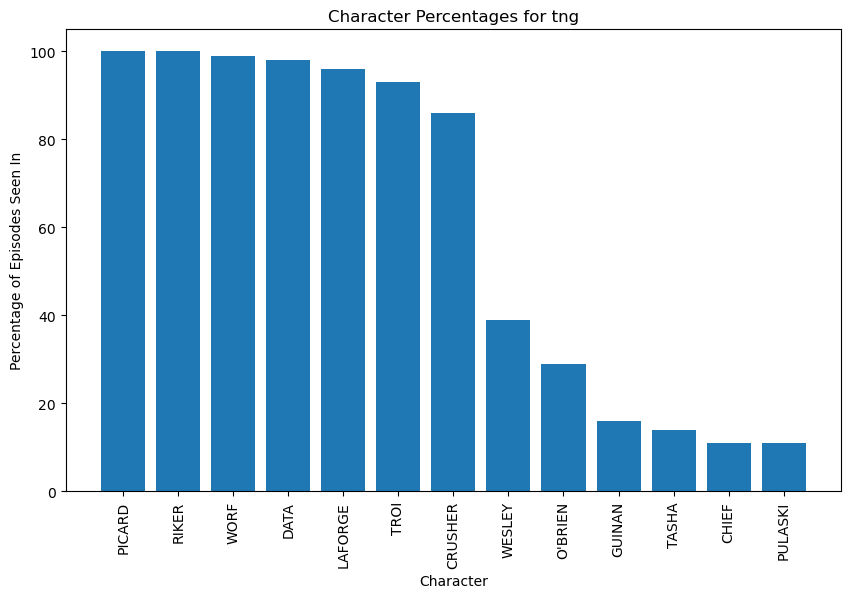

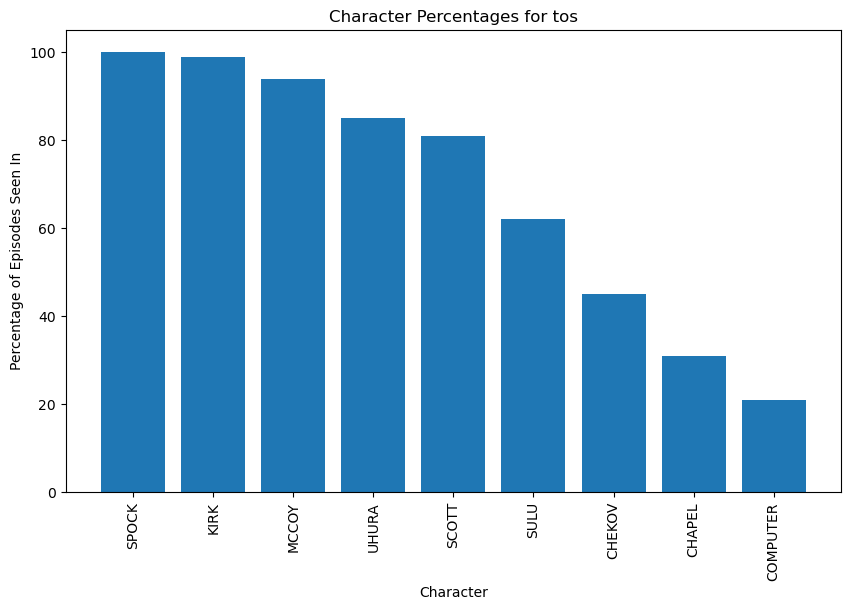

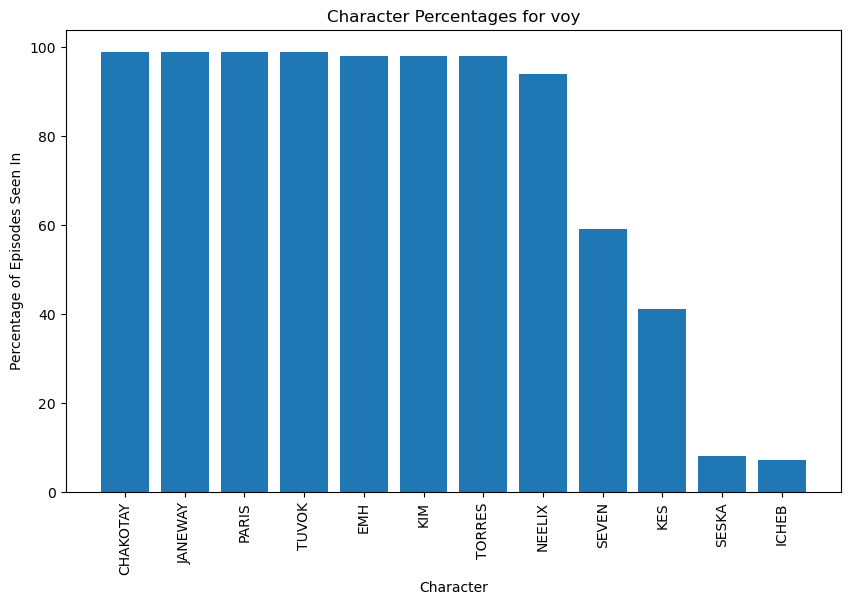

In [104]:
plot_percentage_episodes_each_character_appears(character_percentages)